# KNN model

k=1, MSE: 0.4568048876033849, RMSE: 0.6758734257265815, MAE: 0.4731019183274559, R^2: 0.31969337253758745
k=2, MSE: 0.3701162385625441, RMSE: 0.6083717930365806, MAE: 0.43855758669395467, R^2: 0.44879633108441297
k=3, MSE: 0.35424033168819097, RMSE: 0.5951809234914968, MAE: 0.4460598268639798, R^2: 0.472439871153047
k=4, MSE: 0.3232816990112732, RMSE: 0.568578665631479, MAE: 0.42692618737972293, R^2: 0.518545689104732
k=5, MSE: 0.33569247796581053, RMSE: 0.5793897461690278, MAE: 0.4451282388775819, R^2: 0.500062666256532
k=6, MSE: 0.3495747775044918, RMSE: 0.5912484904881296, MAE: 0.4582640319290512, R^2: 0.4793881493306469
k=7, MSE: 0.37309122527662547, RMSE: 0.6108119393697421, MAE: 0.4751206011464556, R^2: 0.4443657673292384
k=8, MSE: 0.38919357392924353, RMSE: 0.6238538081387687, MAE: 0.48824151120371534, R^2: 0.42038499391072437
k=9, MSE: 0.40281420030493537, RMSE: 0.6346764532460105, MAE: 0.49838641434144976, R^2: 0.4001001794417124
k=10, MSE: 0.40784224520773865, RMSE: 0.6386252

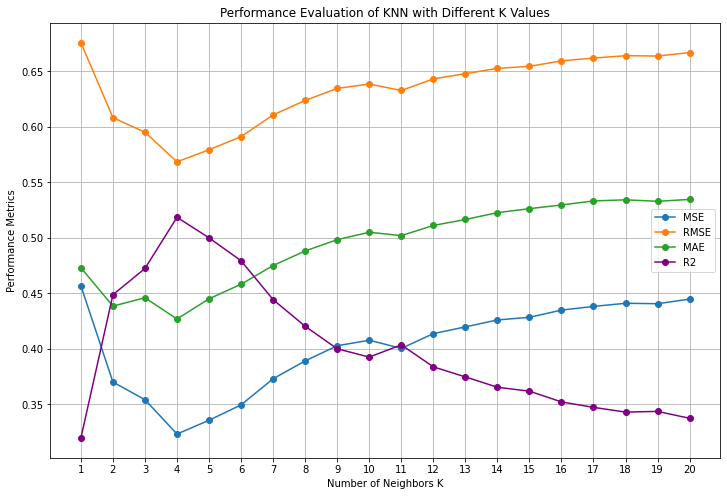

In [18]:
import numpy as np
import pandas as pd

# Function to evaluate KNN for different k values and print metrics
def evaluate_knn(X_train, y_train, X_test, y_test):
    mse_scores = []
    rmse_scores = []
    mae_scores = []
    r2_scores = []

    for k in range(1, 21):
        y_pred = predict(X_train, y_train, X_test, k)
        mse = np.mean((y_test - y_pred) ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(y_test - y_pred))
        r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

        mse_scores.append(mse)
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_scores.append(r2)

        print(f"k={k}, MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R^2: {r2}")

    # Find the best k based on the lowest MSE
    best_k = np.argmin(mse_scores) + 1  # Adding 1 because index starts from 0
    return best_k, mse_scores, rmse_scores, mae_scores, r2_scores

# calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Function to predict the test dataset
def predict(X_train, y_train, X_test, k):
    predictions = []
    for x in X_test:
        predictions.append(predict_single(X_train, y_train, x, k))
    return np.array(predictions)

# Function to make predictions for each test sample
def predict_single(X_train, y_train, x, k):
    distances = [euclidean_distance(x, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    return np.mean(k_nearest_labels)

# load data
x_data_path = 'outlier_cleaned.csv'
y_data_path = 'CHEMBI_active.csv'

y_data = pd.read_csv(y_data_path)
x_data = pd.read_csv(x_data_path)

y = y_data['pIC50'].values
X = x_data.values

# Splitting the data
indices = np.random.permutation(len(X))
split_point = int(len(X) * 0.8)
train_idx, test_idx = indices[:split_point], indices[split_point:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# Evaluate the model and print the best k and its metrics
best_k, mse, rmse, mae, r2 = evaluate_knn(X_train, y_train, X_test, y_test)
print(f"The best k is {best_k}")

#plot the Performance Evaluation of KNN with Different K Values
plt.figure(figsize=(12, 8))
plt.plot(range(1, 21), mse, marker='o', label='MSE')
plt.plot(range(1, 21), rmse, marker='o', label='RMSE')
plt.plot(range(1, 21), mae, marker='o', label='MAE')
plt.plot(range(1, 21), r2, marker='o', label='R2', color='purple')  # Custom color for visibility
plt.title('Performance Evaluation of KNN with Different K Values')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Performance Metrics')
plt.xticks(range(1, 21))  
plt.legend()
plt.grid(True)
plt.show()



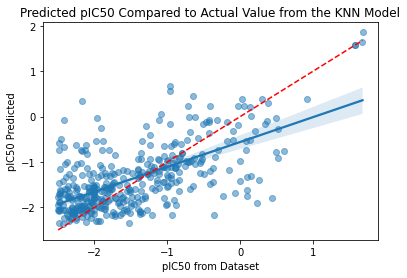

In [23]:
import seaborn as sns

# Evaluate the performance of knn model using the optimal k=4
k = 4 
y_pred = predict(X_train, y_train, X_test, k)
data = pd.DataFrame({
    "Test": y_test,
    "Predicted": y_pred
})

# Create the regression plot
sns.regplot(x='Test', y='Predicted', data=data, scatter_kws={'alpha':0.5})
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='y=x Line')
plt.title('Predicted pIC50 Compared to Actual Value from the KNN Model')
plt.xlabel("pIC50 from Dataset")
plt.ylabel("pIC50 Predicted")
plt.show()